# Trabajo computacional 1

## Ejercicio 1

Primero importamos las librerias que precisamos

In [11]:
from lectura import ldata
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

Definimos las funciones que vamos a utilizar

In [12]:
def es_dirigido(data):
    """Data en forma de lista de enlaces (tuplas). Si el resultado es 0,
    entonces es no dirigido; si es distinto de cero, es dirigido."""
    n = 0
    for (x, y) in data:
        for (a, b) in data:
            if a == y and b == x:
                n += 1
    return n/2

def k_medio(G):
    N = G.order()
    if isinstance(G, nx.DiGraph):
        kin_med = sum(k for (nodo, k) in G.in_degree) / N
        kout_med = sum(k for (nodo, k) in G.out_degree) / N
    else:
        kin_med, kout_med = 0, 0
    k_med = sum(k for (nodo, k) in G.degree) / N
    return kin_med, kout_med, k_med

def k_extremos(G):
   k_min = min(k for (nodo, k) in G.degree)
   k_max = max(k for (nodo, k) in G.degree)
   return k_min, k_max

def clustering(nodo):
    # Esto sería para grafos dirigidos
    pass

def clustering_medio(G):
    # Esto sería para grafos dirigidos
    return np.average(list(dict(nx.clustering(G)).values()))

Importamos las redes.

In [13]:
apms = ldata('Tp1/tc01_data/yeast_AP-MS.txt')

lit = ldata('Tp1/tc01_data/yeast_LIT.txt')

y2h = ldata('Tp1/tc01_data/yeast_Y2H.txt')

### Punto a

Vamos a graficar las tres redes, en principio asumiendo que  todas son dirigidas.

In [26]:
g_apms = nx.DiGraph()
g_apms.add_edges_from(apms)

g_lit = nx.DiGraph()
g_lit.add_edges_from(lit)

g_y2h = nx.DiGraph()
g_y2h.add_edges_from(y2h)

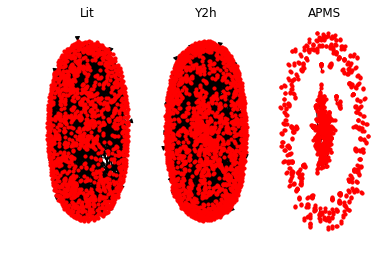

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.sca(ax1)
ax1.set_title('Lit')
nx.draw(g_lit, node_size = 10)

plt.sca(ax2)
ax2.set_title('Y2h')
nx.draw(g_y2h, node_size = 10)

plt.sca(ax3)
ax3.set_title('APMS')
nx.draw(g_apms, node_size = 10)

### Punto b

Presentamos una tabla con los datos que se pedian

In [16]:
## Aca va la tabla que esta subida en la carpeta compartida.

Obs: Los valores que tienen un aserisco se computaron asumiendo que las redes Y2h y Lit son no dirigidas. A partir de aqui, se asumira que efectivamente no lo son.

El codigo para generar los valores de la tabla es el siguiente

El criterio para disernir si una red es dirigida es el siguiente. Si observamos en la lista de conecciones entre nodos de la red que existen pares de nodos conetados 2 veces entre sí, la red es dirigida. 

In [17]:
print(es_dirigido(apms), es_dirigido(lit),
      es_dirigido(y2h))

0.0 40.5 112.5


Vemos que bajo este criterio, las redes Y2H y Lit son dirigidas, mientras que la red AP-MS no.

Observación: Charlando con los chicos de la práctica, coincidimos en que este criterio para distinguir entre redes dirigidas y no dirigidas no es correcto, ya que el hecho de que exista mas de una concección entre el mismo par de nodos se puede deber a que la red no fue lo suficientemente depurada. Eventualmente vamos a asumir que las tres redes son no dirigidas.

In [27]:
#Mati: Ver que onda esto de aca abajo
print(es_dirigido(apms) / g_apms.size(), es_dirigido(lit) / g_lit.size(),
      es_dirigido(y2h) / g_y2h.size())

0.0 0.013846153846153847 0.03839590443686007


Para calcular cuantos nodos hay:

In [19]:
print('El número de nodos de cada grafo es',
      g_lit.order(), g_y2h.order(), g_apms.order()) 

El número de nodos de cada grafo es 1536 2018 1622


Para calcular cuantos enlaces hay:

In [20]:
print('El número de enlaces para cada grafo es',
      g_lit.size(), g_y2h.size(), g_apms.size())

El número de enlaces para cada grafo es 2925 2930 9070


Calculamos el grado medio (sin tener en cuenta la dirección de los enlaces) para las 3 redes, y el grado medio de entrada y de salida para las redes dirigidas.

In [21]:
kin_medio_lit, kout_medio_lit, k_medio_lit = k_medio(g_lit)
kin_medio_y2h, kout_medio_y2h, k_medio_y2h = k_medio(g_y2h)
_, _, k_medio_apms = k_medio(g_apms)

print('Grados medios')
print(kin_medio_lit, kout_medio_lit, k_medio_lit)
print(kin_medio_y2h, kout_medio_y2h, k_medio_y2h)
print(k_medio_apms)

Grados medios
1.904296875 1.904296875 3.80859375
1.4519326065411298 1.4519326065411298 2.9038652130822595
11.183723797780518


Para las redes dirigidas,  kin y kout medios dan lo mismo. Esto se explica si pensamos en una red en donde existen 2 nodos que no estan conectados entre si. Si ahora tendemos un enlace dirigido entre ambos, tanto el grado medio kin como el grado medio kout aumentaran.

Observación: A partir de aqui, se asumira que todas las redes son no dirigidas.

In [28]:
g_apms = nx.Graph()
g_apms.add_edges_from(apms)

g_lit = nx.Graph()
g_lit.add_edges_from(lit)

g_y2h = nx.Graph()
g_y2h.add_edges_from(y2h)

Calculo del grado maximo y el grado minimo.

In [29]:
k_min_apms, k_max_apms = k_extremos(g_apms)
k_min_lit, k_max_lit = k_extremos(g_lit)
k_min_y2h, k_max_y2h = k_extremos(g_y2h)
print('Grados extremos')
print(k_min_apms, k_max_apms)
print(k_min_y2h, k_max_y2h)
print(k_min_lit, k_max_lit)

Grados extremos
1 127
1 91
1 40


Para calcular la densidad de la red, usamos la función nx.density.

In [30]:
print('La densidad de las redes es', nx.density(g_lit), nx.density(g_y2h),
      nx.density(g_apms))

La densidad de las redes es 0.002481168566775244 0.0014396951973635397 0.006899274397150227


Vamos a calcular dos coeficientes de clusterig. El primero (<C_i>) es un promedio entre los coeficientes de cluesting local de cada nodo de la red. El segundo (C_Δ) es un coeficiente de clustering global que mide la proporción de triganulo formados en la red sobre el número de triadas de la misma.

In [33]:
print('C_Δ')
print (nx.transitivity(g_apms), nx.transitivity(g_y2h),
       nx.transitivity(g_lit))
# Ignora diferencia entre in y out


print('<C_i>')
print(clustering_medio(g_apms))
print(clustering_medio(g_y2h))
print(clustering_medio(g_lit))

C_Δ
0.6185901626483971 0.02361415364051535 0.3461926495315878
<C_i>
0.5546360657013015
0.046194001297365124
0.2924923005815713


Observacion importante: El método C_Δ no diferencia entre enlaces entrantes y salientes en redes dirigidas. El método <C_i> no está definido para redes dirigidas.

Para calcular el diámetro de la red, utilizamos la función nx.diameter.

In [ ]:
print('El diámetro de las redes es', nx.diameter(g_lit,e=None),
nx.diameter(g_y2h,e=None), nx.diameter(g_apms,e=None))

Como se observa, el diametro de las tres redes es infinito, ya que existen nodos que no estan conectados entre si. Lo que podemos hacer es calcular el diámetro de la componente gigante, para estimar el orden de magnitud.

In [41]:
#FALTA: Calcular la densidad de la componente gigante. Para obtener la componente gigante, usar 
#connected_component_subgraphs. La sigo mañana por dolor de cabeza.

### Punto c

Algunas observaciones que podemos hacer a partir de nuestro analisis. En primer lugar, se observa que la clusterización de la red AP-MS es mayor que la de la red Y2H y la red Lit. Esto es así ya que los nodos de esta red tienden a organizarse en clickers (grupos de nodos, todos conectados con todos).

## Ejercicio 2

Importamos nuestras librerías

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.readwrite.gml import read_gml
from graficar_multipartito import *
from modularidad import modularidad

from random import sample
from dolphins_funciones import (genero_a_color, particionar_por_genero,
                                crear_leyenda, contar_enlaces_internos,
                                contar_enlaces_entre_grupos,
                                contar_clases)

from lectura import ldata
import sys
sys.path.append('./Tp1/')
from histograma import histograma

In [5]:
dolph = read_gml('tc01_data/new_dolphins.gml')
genders = dict(ldata('tc01_data/dolphinsGender.txt'))

# Agrego los sexos a los dicts de cada delfín
for nodo, dict_nodo in dict(dolph.nodes).items():
    dict_nodo['gender'] = genders[nodo] # agrego el sexo del delfín a su dict
#    print('Key = {}, Value = {}'.format(nodo, dict_nodo)) # para chequear que anda

particiones = particionar_por_genero(dolph)
colores = [genero_a_color(g) for g in nx.get_node_attributes(dolph, "gender").values()]    

# Hay 34 delfines macho, 24 delfines hembra y 4 delfines sin información

### Punto a

Graficamos de 9 maneras diferentes

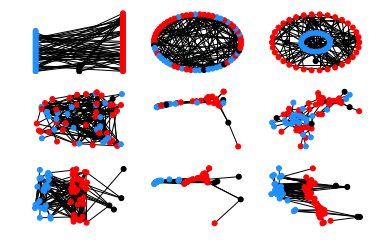

In [15]:
fig, axes = plt.subplots(3,3)
axes = axes.flatten()
ns = 25 # Node size
# Posicionamiento multipartito (es engañoso: no se ven los links homofílicos)
multipartite_pos = position_multipartito(dolph, ['f', 'NA', 'm'], 'gender')
nx.draw(dolph, ax = axes[0], node_size = ns, node_color=colores,
        pos=multipartite_pos)
# Posicionamiento en un círculo
nx.draw_circular(dolph, ax = axes[1], node_size = ns, node_color=colores)
# Posicionamiento en círculos concéntricos
shell_pos = nx.drawing.layout.shell_layout(dolph, particiones)
nx.draw(dolph, ax = axes[2], node_size = ns, node_color=colores,
        pos=shell_pos)
# Posicionamiento al azar
nx.draw_random(dolph, ax = axes[3], node_size = ns, node_color=colores)
# Posicionamiento espectral
nx.draw_spectral(dolph, ax = axes[4],
                 node_size = ns, node_color=colores)
# Posicionamiento por resortes
nx.draw_spring(dolph, ax = axes[5],
                 node_size = ns, with_labels=False, node_color=colores)
# Posicionamiento multipartito al azar. Posiciono al azar y
# luego desplazo lateralmente según género
multi_random_pos = position_multipartito_random(dolph,
                                                ['f', 'm', 'NA'], 'gender')
nx.draw(dolph, ax = axes[6], node_size = ns, node_color=colores,
        pos=multi_random_pos)
# Posicionamiento multipartito espectral. Posiciono por espectro y
# luego desplazo lateralmente según género
multi_spectral_pos = position_multipartito_spectral(dolph, ['f', 'm', 'NA'],
                                                    'gender', dhorizontal=0.5)
nx.draw(dolph, ax = axes[7], node_size = ns, node_color=colores,
        pos=multi_spectral_pos)
# Posicionamiento multipartito por resortes. Posiciono por resortes y
# luego desplazo lateralmente según género
multi_spring_pos = position_multipartito_spring(dolph, ['f', 'm', 'NA'],
                                                'gender', dhorizontal=2)
nx.draw(dolph, ax = axes[8], node_size = ns, node_color=colores,
        pos=multi_spring_pos)

## Punto b

Primero vamos a quedarnos con un subgrafo del original, en donde elminamos los nodos con genero no definido.

In [6]:
delfines_con_info = [d for d in dolph.nodes() if d not in particiones[1]]
dolph2 = nx.subgraph(dolph, delfines_con_info).copy()

Simulamos 1000 redes diferentes

In [ ]:
n_simulaciones = int(1e3)
enlaces_entre_grupos = np.zeros((n_simulaciones))
modularidades = np.zeros((n_simulaciones))
grafo_h0 = dolph2.copy()
# Vamos a ir modificando este grafo "in place" (no lo clonamos n veces)

for i in range(n_simulaciones):
    # Mezclamos la lista de nombres de delfines.
    # A los primeros 24 delfines les reasignamos género hembra
    # El resto van a ser macho.
    hembras = sample(list(grafo_h0.nodes()), 24)
    for nombre in grafo_h0.nodes():
        if nombre in hembras:
            grafo_h0.nodes()[nombre]['gender'] = 'f'
        else:
            grafo_h0.nodes()[nombre]['gender'] = 'm'
    enlaces_entre_grupos[i] = contar_enlaces_entre_grupos(grafo_h0, 'gender')
    modularidades[i] = modularidad(grafo_h0, 'gender')
    # Generar visualización para cada grafo (solo descomentar si
    # n_simulaciones es menor a 10!!!!))
    # fig, ax = plt.subplots()
    # colores = [genero_a_color(g) for g in nx.get_node_attributes(grafo_h0, "gender").values()]    
    # multi_spring_pos = position_multipartito_spring(grafo_h0, ['f', 'm'],
    #                                                 'gender', dhorizontal=1.5)
    # nx.draw(grafo_h0, ax = ax, node_size = ns, node_color=colores,
    #         pos=multi_spring_pos)
    # ax.set_title('Género aleatorizado, delfines sin información ignorados')
    # crear_leyenda(ax)
    
    
    

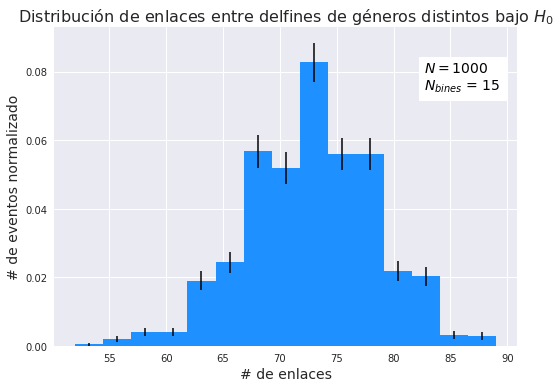

In [8]:
#Visualizar distribución de enlaces entre grupos bajo hipótesis nula
valor_real = contar_enlaces_entre_grupos(dolph2, 'gender')
fig, ax = histograma(enlaces_entre_grupos, bins=15, density=True,
                     titulo=r'Distribución de enlaces entre delfines de géneros distintos bajo $H_0$',
                     magnitud_x='# de enlaces')
ax.axvline(valor_real, color='deeppink',
           label='Valor real = {}'.format(valor_real))
ax.legend()    